## <span style="color:lightblue">**Problem Statement  1:**</span>
Load the "Country-data.csv" dataset into a DataFrame and perform the following tasks:
1. Create a seperate DataFrame with only numeric data by removing the "country" column
2. Scale the data using the Standard Scaler to create a scaled DataFrame
3. Plotting dendograms with the complete linkage method
4. Creating cluster labels using cut tree
5. Perfom the 4-Component PCA on DataFrame
6. Now, from final the DataFrame, analyze how low GDP rate corresponds to the child mortality rate around the world

In [15]:
#Importing the useful Libraries


#dataFrame manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("Display.max_columns", None)
pd.set_option("Display.max_rows", None)

#Needed  Libraries


#Algorithm and scikit learn libraries
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import StandardScaler

In [7]:
country_df = pd.read_csv("./../Assignment_files/Assignment5/Country-data.csv")
print(f'the shape of the country_df is: {country_df.shape}')
country_df.head()

the shape of the country_df is: (167, 10)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [8]:
#Task1 Creating a seperate DataFrame with only numeric data (removed the country column)
numeric_country_df = country_df.drop("country", axis=1)
numeric_country_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [11]:
#Task2: Scaling the dataFrame to create a scaled DataFrame
std_scaler = StandardScaler()
scaled_df = std_scaler.fit_transform(numeric_country_df.to_numpy())
scaled_df = pd.DataFrame(scaled_df, columns=numeric_country_df.columns)
scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


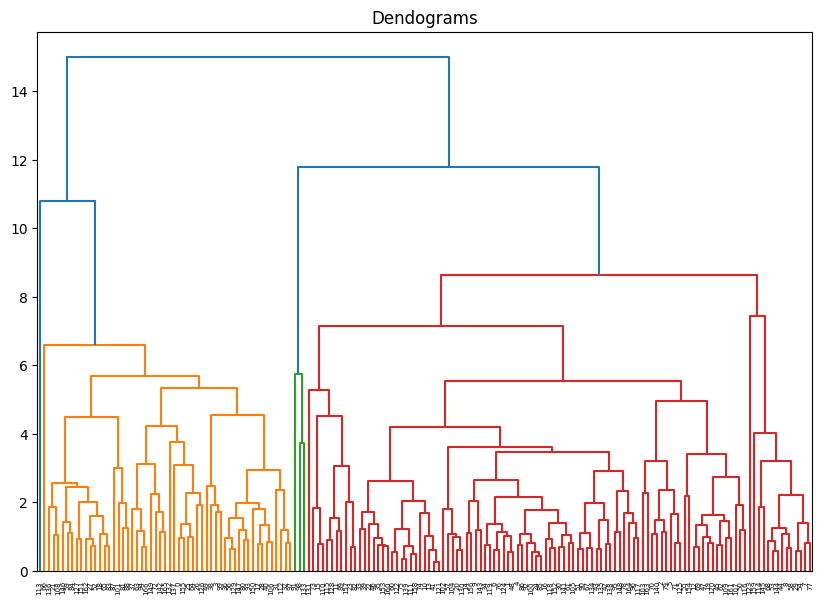

In [20]:
plt.figure(figsize=(10, 7))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(scaled_df, method="complete"))

(167, 9)

(15,)